In [2]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde

# Use the Solarize Light style globally
plt.style.use("Solarize_Light2")

# Set global parameters for black axes, labels, and grid
plt.rcParams['grid.color'] = 'white'               # Grid color
plt.rcParams['grid.linestyle'] = '--'              # Grid linestyle
plt.rcParams['grid.alpha'] = 0.7                   # Grid transparency
plt.rcParams['axes.edgecolor'] = 'black'           # Axis border color
plt.rcParams['axes.labelcolor'] = 'black'          # Axis label color
plt.rcParams['xtick.color'] = 'black'              # X-axis tick color
plt.rcParams['ytick.color'] = 'black'              # Y-axis tick color
plt.rcParams['text.color'] = 'black'               # Default text color, affects title color

In [3]:
atk2000_qoe_metrics = pd.read_csv("./150_qoe_atk2000_noids.csv").fillna(0)
atk500_qoe_metrics = pd.read_csv("./150_qoe_atk500_noids.csv").fillna(0)
atk100_qoe_metrics = pd.read_csv("./150_qoe_atk100_noids.csv").fillna(0)
atk50_qoe_metrics = pd.read_csv("./150_qoe_atk50_noids.csv").fillna(0)
atk0_qoe_metrics = pd.read_csv("./br_150_qoe_noatk_noids.csv")
atk0_qoe_metrics["media_loading_duration"] = atk0_qoe_metrics["media_loading_duration"].fillna(150000)
atk0_qoe_metrics["video_resolution"] = atk0_qoe_metrics["video_resolution"].fillna(0)

# Average Distribution

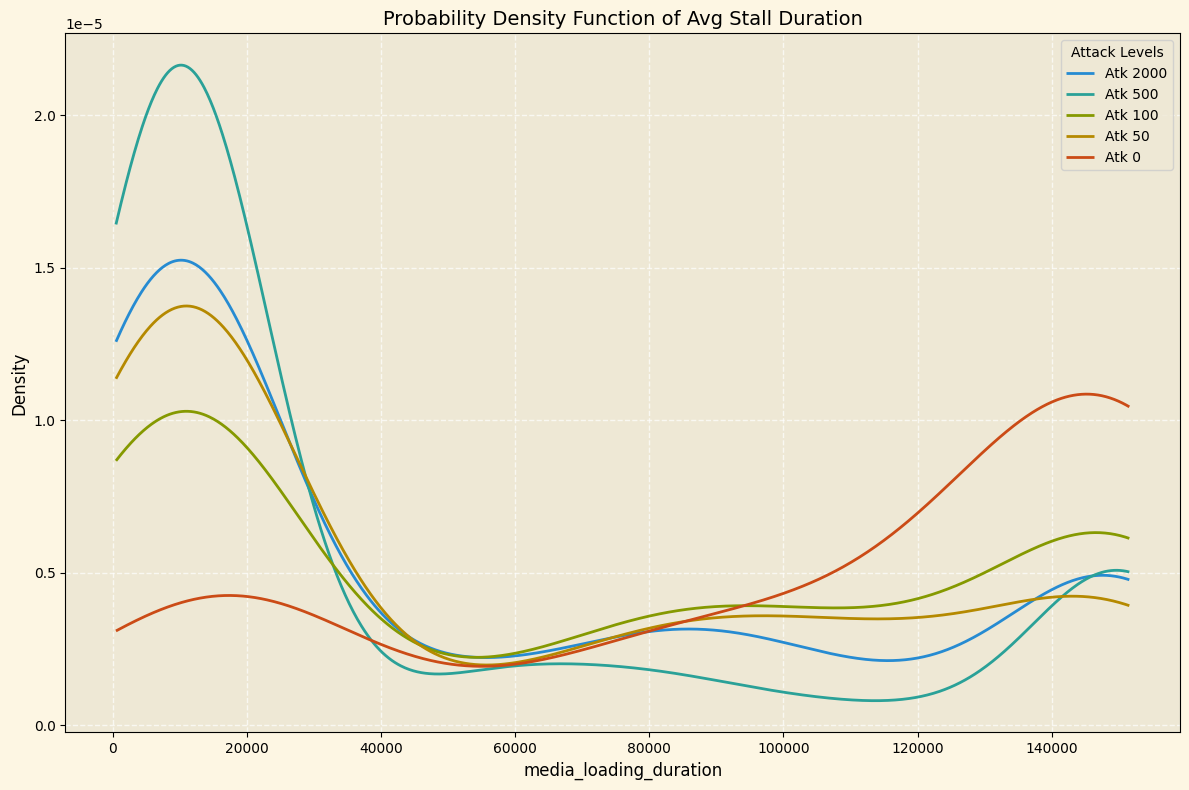

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load and preprocess datasets
cpu = 0.5


# Target metric
metric = "avg_stall_duration"
metric = "video_resolution"
metric = "media_loading_duration"

# KDE for each dataset to compute the PDF
atk2000_kde = gaussian_kde(atk2000_qoe_metrics[metric])
atk500_kde = gaussian_kde(atk500_qoe_metrics[metric])
atk100_kde = gaussian_kde(atk100_qoe_metrics[metric] )
atk50_kde = gaussian_kde(atk50_qoe_metrics[metric])
atk0_kde = gaussian_kde(atk0_qoe_metrics[metric])


# Define the range of x values based on the data
x_values = np.linspace(
    min(atk2000_qoe_metrics[metric].min(), atk500_qoe_metrics[metric].min(),
        atk100_qoe_metrics[metric].min(), atk50_qoe_metrics[metric].min()),
    max(atk2000_qoe_metrics[metric].max(), atk500_qoe_metrics[metric].max(),
        atk100_qoe_metrics[metric].max(), atk50_qoe_metrics[metric].max()),
    1000
)

# Plot the PDFs
plt.figure(figsize=(12, 8))
plt.plot(x_values, atk2000_kde(x_values), label="Atk 2000", linewidth=2)
plt.plot(x_values, atk500_kde(x_values), label="Atk 500", linewidth=2)
plt.plot(x_values, atk100_kde(x_values), label="Atk 100", linewidth=2)
plt.plot(x_values, atk50_kde(x_values), label="Atk 50", linewidth=2)
plt.plot(x_values, atk0_kde(x_values), label="Atk 0", linewidth=2)

# Add labels, legend, and title
plt.title("Probability Density Function of Avg Stall Duration", fontsize=14)
plt.xlabel(f"{metric}", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Attack Levels", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a PDF
plt.tight_layout()

# Per CPU

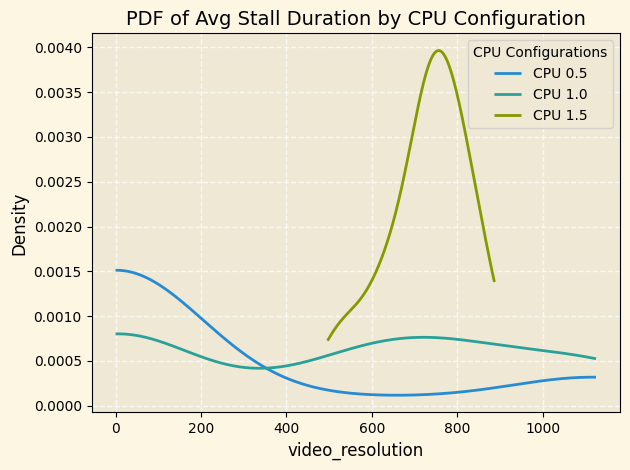

In [5]:
# Plot the KDE for each CPU configuration
metric = "video_resolution"
for cpu, group in atk0_qoe_metrics.groupby('cpu'):
    kde = gaussian_kde(group[metric])
    x_values = np.linspace(group[metric].min(), group[metric].max(), 1000)
    plt.plot(x_values, kde(x_values), label=f"CPU {cpu}", linewidth=2)

# Add labels, legend, and title
plt.title("PDF of Avg Stall Duration by CPU Configuration", fontsize=14)
plt.xlabel(f"{metric}", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="CPU Configurations", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Per User

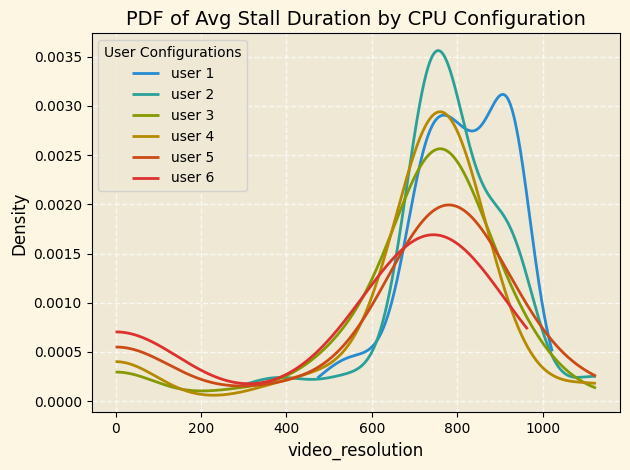

In [31]:
# Plot the KDE for each CPU configuration
metric = "video_resolution"
for user, group in atk0_qoe_metrics.groupby('user'):
    kde = gaussian_kde(group[metric])
    x_values = np.linspace(group[metric].min(), group[metric].max(), 1000)
    plt.plot(x_values, kde(x_values), label=f"user {user}", linewidth=2)

# Add labels, legend, and title
plt.title("PDF of Avg Stall Duration by CPU Configuration", fontsize=14)
plt.xlabel(f"{metric}", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="User Configurations", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Per User and CPU

Error from:  1 4.0
Error from:  1 5.0
Error from:  1 5.5
Error from:  2 4.0
Error from:  3 0.5
Error from:  4 0.5
Error from:  5 0.5
Error from:  6 0.5
Error from:  6 1.0


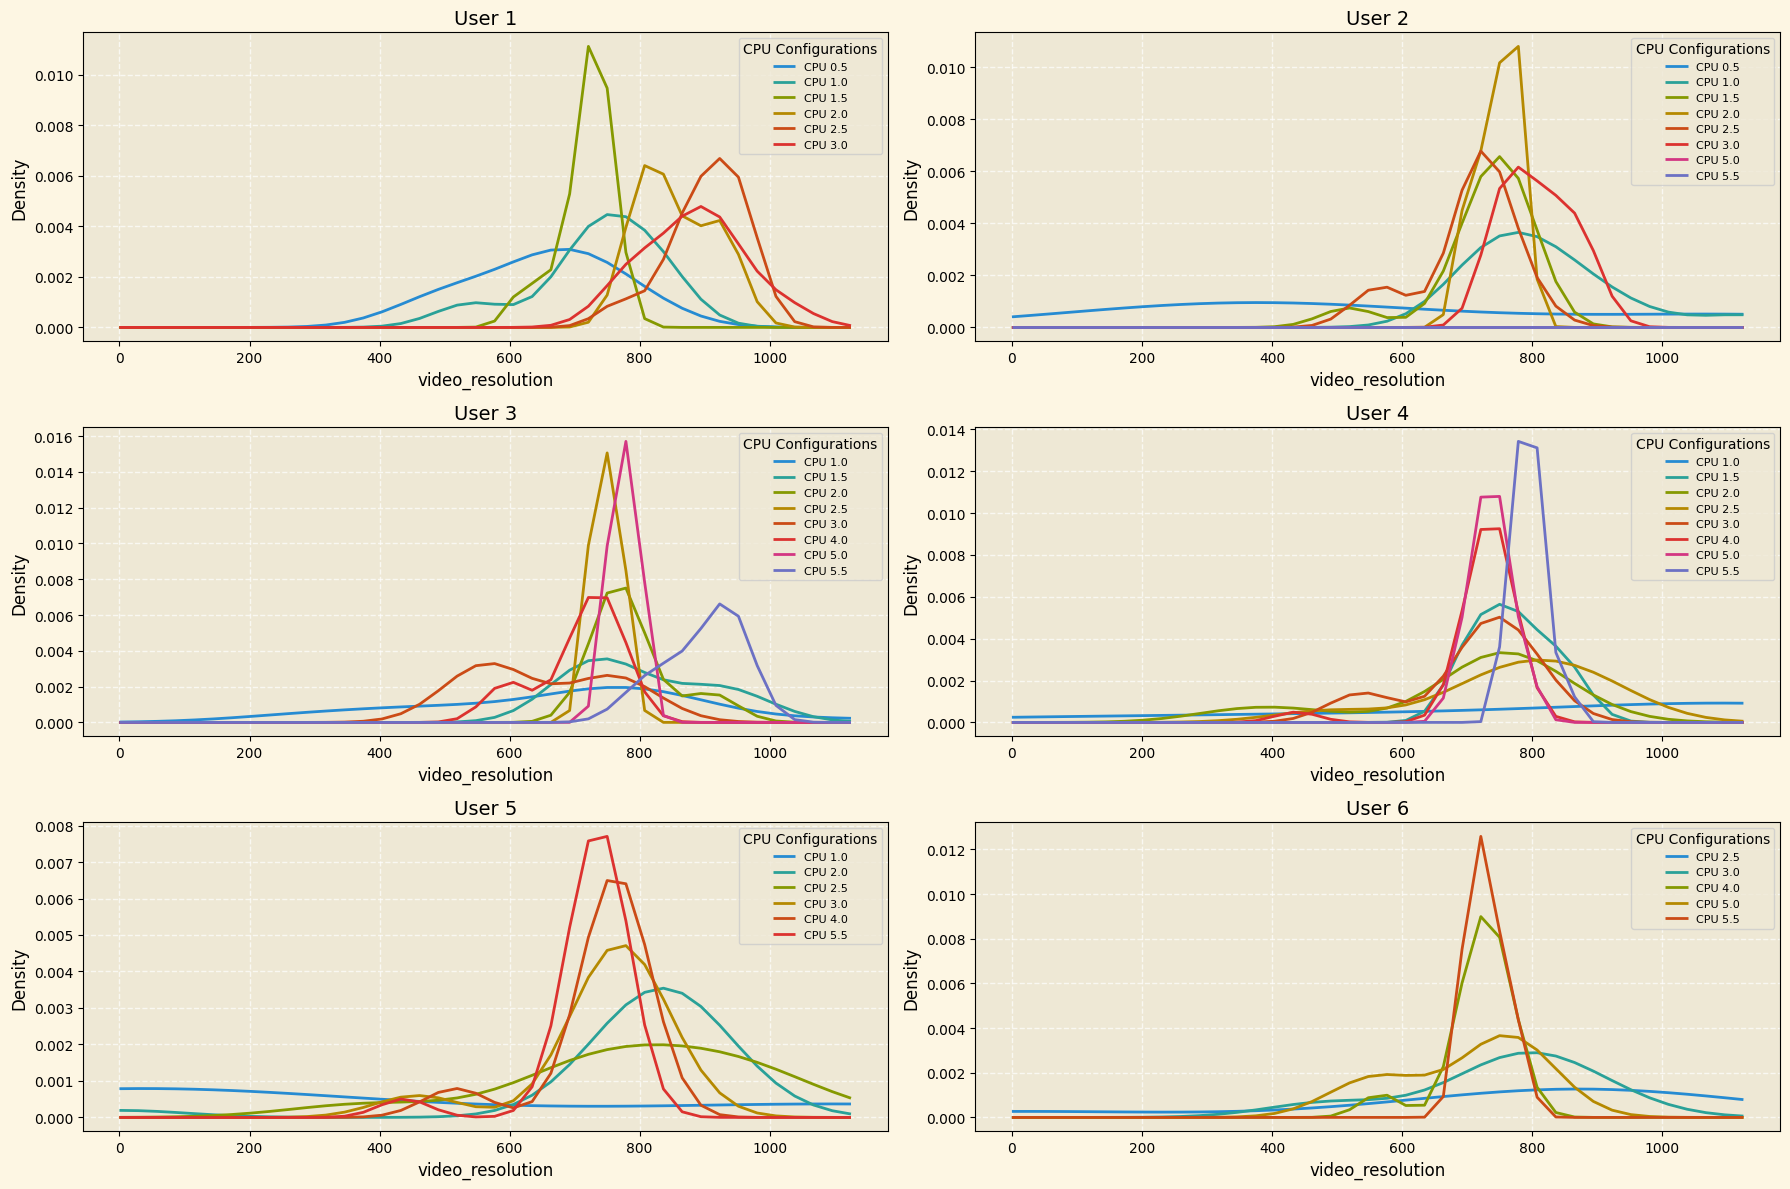

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np


# Target metric
metric = "video_resolution"

# Get unique users
unique_users = atk0_qoe_metrics['user'].unique()

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each user's data in a subplot
for i, user in enumerate(unique_users):
    if i >= len(axes):  # Skip if more users than subplots
        break

    ax = axes[i]
    user_group = atk0_qoe_metrics[atk0_qoe_metrics['user'] == user]
    for cpu, cpu_group in user_group.groupby('cpu'):
        try:
            kde = gaussian_kde(cpu_group[metric])
            # x_values = np.linspace(0,150000, 40)
            x_values = np.linspace(0,1125, 40)
            ax.plot(x_values, kde(x_values), label=f"CPU {cpu}", linewidth=2)
        except:
            print("Error from: ", user, cpu)
    # Customize subplot
    ax.set_title(f"User {user}", fontsize=14)
    ax.set_xlabel(f"{metric}", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend(title="CPU Configurations", fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots if any
for j in range(len(unique_users), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()        

### Attack 2000

/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
/tmp/ipykernel_922636/3269548647.py:23: UserWarning: Boolean Series key will be reind

Error from:  2 2.0
Error from:  3 0.5


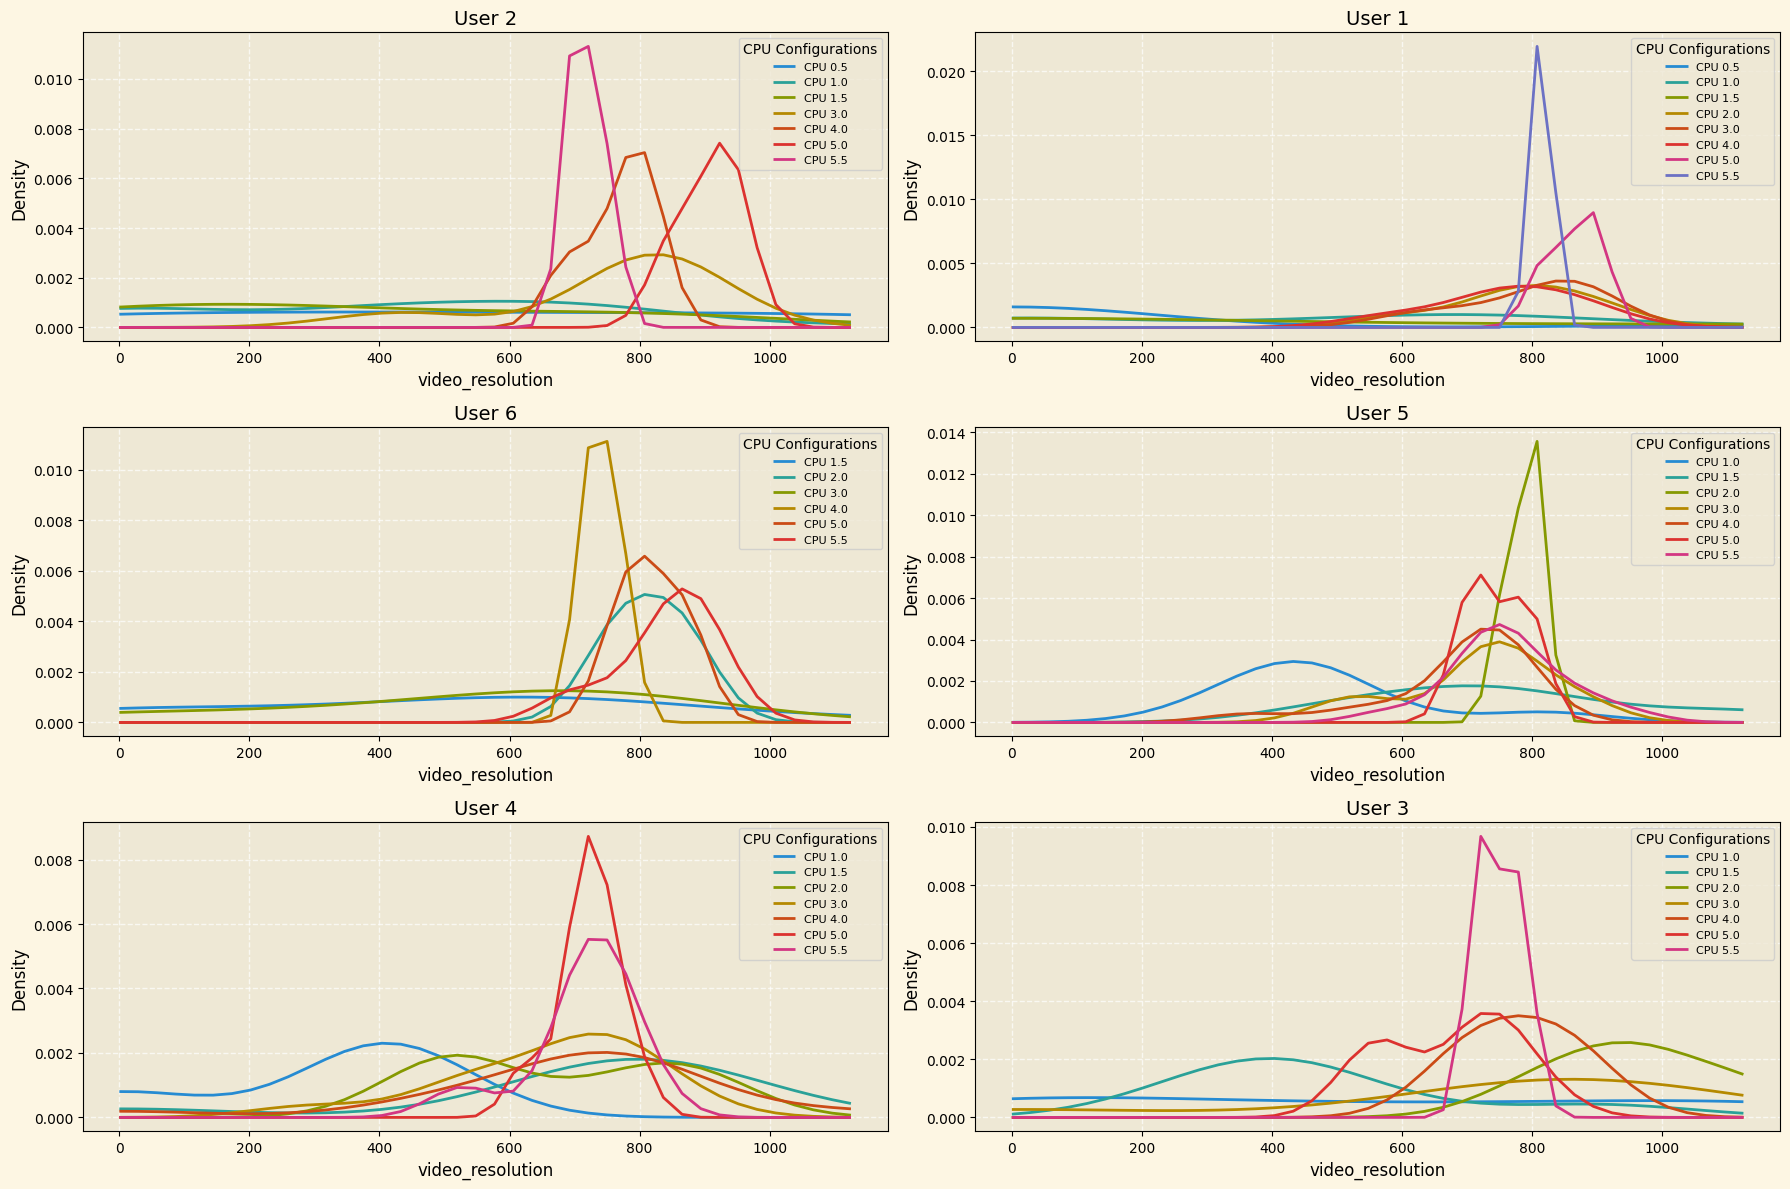

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np


# Target metric
metric = "video_resolution"

# Get unique users
unique_users = atk50_qoe_metrics['user'].unique()

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each user's data in a subplot
for i, user in enumerate(unique_users):
    if i >= len(axes):  # Skip if more users than subplots
        break

    ax = axes[i]
    user_group = atk50_qoe_metrics[atk0_qoe_metrics['user'] == user]
    for cpu, cpu_group in user_group.groupby('cpu'):
        try:
            kde = gaussian_kde(cpu_group[metric])
            # x_values = np.linspace(0,150000, 40)
            x_values = np.linspace(0,1125, 40)
            ax.plot(x_values, kde(x_values), label=f"CPU {cpu}", linewidth=2)
        except:
            print("Error from: ", user, cpu)
    # Customize subplot
    ax.set_title(f"User {user}", fontsize=14)
    ax.set_xlabel(f"{metric}", fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend(title="CPU Configurations", fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots if any
for j in range(len(unique_users), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()        

### API Test

In [102]:
import requests
import pandas as pd
# Flask server URL
FLASK_SERVER_URL = "http://192.168.50.157:3050/query-prometheus"

QUERIES = {
    "CPU Usage": "sum(rate(container_cpu_usage_seconds_total{namespace='default'}[150s])) by (pod)",
    "CPU Limit": "sum(kube_pod_container_resource_limits{resource='cpu', namespace='default'}) by (pod)",
    "Memory Usage": "sum(rate(container_memory_usage_bytes{namespace='default', container!=''}[150s])) by (pod)",
    "Memory Limit": "sum(kube_pod_container_resource_limits{resource='memory', namespace='default'}) by (pod)",
    "NW Throughput Transmit": "sum(rate(container_network_transmit_bytes_total{namespace='default'}[150s]))",
    "NW Throughput Receive": "sum(rate(container_network_receive_bytes_total{namespace='default'}[150s]))",
    "Packet Drops": "sum(rate(container_network_receive_packets_dropped_total{namespace='default'}[150s]))",
    # "Disk I/O Read": "sum(rate(node_disk_read_bytes_total{node='worker3'}[150s]))",
    # "Disk I/O Write": "sum(rate(node_disk_written_bytes_total{node='worker3'}[150s]))",
    # "Disk Usage": "sum(node_filesystem_avail_bytes{namespace='default'}) / sum(node_filesystem_size_bytes{namespace='default'})",
    "Evicted Pods": "rate(kube_pod_container_status_last_terminated_reason{reason='Evicted', namespace='default'}[150s])",
    "OOM Killed Pods": "rate(kube_pod_container_status_last_terminated_reason{reason='OOMKilled', namespace='default'}[150s])",
    "Number of Pods": "count(kube_pod_status_phase{phase='Running', namespace='default'})"
}

def query_metric(metric_name, query, default_value=0):
    """
    Query a specific metric from the Flask server and return aggregated results as a Series.
    
    Args:
        metric_name (str): Name of the metric.
        query (str): PromQL query to execute.
        default_value: Default value to use if the query result is None or empty.

    Returns:
        pd.Series: A Series with Metric as the index and Value as the data.
    """
    try:
        response = requests.get(FLASK_SERVER_URL, params={"query": query})
        response.raise_for_status()  # Raise an HTTPError for bad responses
        data = response.json()

        # Aggregate values
        aggregated_value = default_value
        if data["status"] == "success" and "data" in data and "result" in data["data"] and data["data"]["result"]:
            aggregated_value = sum(
                float(item["value"][1]) if item["value"][1] is not None else default_value
                for item in data["data"]["result"]
            )
        else:
            print(f"No data found for metric: {metric_name}. Defaulting to {default_value}.")

        # Return a Series
        return pd.Series({"Metric": metric_name, "Value": aggregated_value})
    except requests.exceptions.RequestException as e:
        print(f"Error querying {metric_name}: {e}")
        # Return a default Series on request error
        return pd.Series({"Metric": metric_name, "Value": default_value})

def main():
    """Fetch metrics and store them in a DataFrame."""
    metric_data = {metric: [] for metric in QUERIES.keys()}

    # Query each metric and store the aggregated value
    for metric_name, query in QUERIES.items():
        series = query_metric(metric_name, query, default_value=0)
        metric_data[metric_name].append(series["Value"])

    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(metric_data)
    
    return df

df = main()

No data found for metric: Evicted Pods. Defaulting to 0.
No data found for metric: OOM Killed Pods. Defaulting to 0.


In [103]:
df

,CPU Usage,CPU Limit,Memory Usage,Memory Limit,NW Throughput Transmit,NW Throughput Receive,Packet Drops,Evicted Pods,OOM Killed Pods,Number of Pods
0,1.894463,1.0,5.013316e+07,3.221225e+09,4.45,2.9,0.0,0,0,1.0


In [1]:
import pkg_resources

# List of packages used in your script
packages = [
    "argparse",
    "json",
    "selenium",
    "random",
    "threading",
    "time",
    "numpy",
    "pandas",
    "os",
    "math",
    "requests",
]

# Check installed versions and write to requirements.txt
with open("requirements.txt", "w") as f:
    for package in packages:
        try:
            version = pkg_resources.get_distribution(package).version
            f.write(f"{package}=={version}\n")
        except pkg_resources.DistributionNotFound:
            # Skip built-in packages like json, os, threading, etc.
            print(f"Skipping built-in or missing package: {package}")

Skipping built-in or missing package: argparse
Skipping built-in or missing package: json
Skipping built-in or missing package: random
Skipping built-in or missing package: threading
Skipping built-in or missing package: time
Skipping built-in or missing package: os
Skipping built-in or missing package: math


/tmp/ipykernel_109120/58333271.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
